<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/L1P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Practica 3

##INTRODUCCIÓN

Esta es la tercera práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [146]:
#Importamos las librerías y la base de datos necesarias

import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
from tabulate import tabulate 

df = pd.read_csv('pokemon.csv',sep=',')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pokémon           20 non-null     object
 1   Tipo              20 non-null     object
 2   PS                20 non-null     int64 
 3   Ataque            20 non-null     int64 
 4   Defensa           20 non-null     int64 
 5   Ataque especial   20 non-null     int64 
 6   Defensa especial  20 non-null     int64 
 7   Velocidad         20 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ KB


,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos las variables, el tipo de las variables con las que trabajamos... y .head vamos a ver que forma tiene la base de datos.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado.

## Comprensión del negocio y definición del problema.

Esta práctica en concreto consiste en un problema de 7 dimensiones, intentar reducir la dimensionalidad pero quedandonos con la mayor información posible, esto se consigue siguendo un método llamado, Análisis de componentes principales.

Para ello haremos uso de un dataset que se puede encontrar en Moodle.


## Comprensión de los datos

La base de datos que utilizaremos consta de 20 observaciones

Existen 8 tipos de atributos distintos:
- Pokemon:
- Tipo (del pokemon, fuego, agua, planta, eléctrico, fantasma)
- Ps (puntos de salud)
- Ataque
- Defensa
- Ataque especial
- Defensa especial
- Velocidad (del pokemon)

Como hemos explicado en el anterior paso de la motodología CRISP vamos a intentar reducir la dimensiones haciendo combianciones lineales de los 7 atributos.


TENEMOS QUE HACER ESTO: normalizar los datos.

##Preparación de los datos

En esta base de datos, tenemos muy pocas observaciones,20, y 8 atributos, por lo que a simple vista podemosver que no hay valores vacíos, no hay outliers...

Aún así, vamos comprobarlo por si hemos leido mal los datos. Primero veremos si faltan valores en algunos de los atributos

In [147]:
pokemonnan = df['Pokémon'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Pokémon es:{pokemonnan}")
tiponan = df['Tipo'].isna().sum()
print(f"La cantidad de NaN que existen en la variable tipo es:{tiponan}")
psnan = df['PS'].isna().sum()
print(f"La cantidad de NaN que existen en la variable PS es:{psnan}")
ataquenan = df['Ataque'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Ataque es:{ataquenan}")
defensanan = df['Defensa'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Defensa es:{defensanan}")
ataqueespecialnan = df['Ataque especial'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Ataque especial es:{ataqueespecialnan}")
defensaespecialnan = df['Defensa especial'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Defensa especial es:{defensaespecialnan}")
velocidadnan = df['Velocidad'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Velocidad es:{velocidadnan}")


La cantidad de NaN que existen en la variable Pokémon es:0
La cantidad de NaN que existen en la variable tipo es:0
La cantidad de NaN que existen en la variable PS es:0
La cantidad de NaN que existen en la variable Ataque es:0
La cantidad de NaN que existen en la variable Defensa es:0
La cantidad de NaN que existen en la variable Ataque especial es:0
La cantidad de NaN que existen en la variable Defensa especial es:0
La cantidad de NaN que existen en la variable Velocidad es:0


Observamos que en ninguno de los atributos van valores faltantes, sin embargo, una de las variables es un "Identificador", el nombre del pokemon, ya que es único, pero la varible tipo es categórica por lo que lo próximo que vamos a hacer es ver si los valores que contiene esta variable tienen sentido.


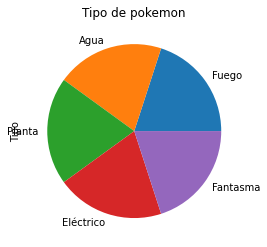

In [148]:
df['Tipo'].value_counts().plot(kind='pie', title='Tipo de pokemon')

Observamos que hay 5 tipos de pokemon, Agua, Fuego, Fantasma, Eléctrico y Planta, en este diagrama de tartas vemos que todas las categorías están más o menos igualmente repartidas, por lo que es una buena señal, consideramos esta variable como buena. Si hubiemos encontrado una categoría con un porcentaje muy bajo, y además un nombre raro, tipo desconocido, o no proporcionado, habría que trabajar con esta variable, pero como este no es el caso damos la varible como buena.

A continuación, vamos a ver como se distribuyen los valores de las variables numéricas, para ver si hay algún outlier o algún dato desproporcionado.

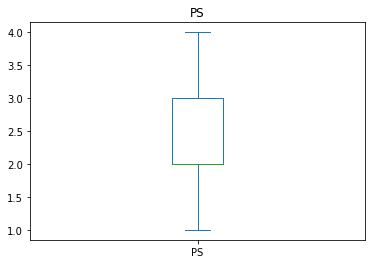

In [149]:
df['PS'].plot(kind='box', title='PS')

En esta variable, Puntos de Salud, vemos que no hay outliers, que además están los datos muy repartidos, es decir, hay prácticamente los mismos datos en todos los valores.

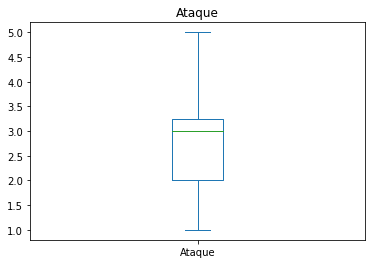

In [150]:
df['Ataque'].plot(kind='box', title='Ataque')

En la variable Ataque no hay outliers, pero una cuarta parte de los pokemons están contentrados entre, 3 y 3.5, la mayoría de los poquemons tienen ese ataque. En los demás valores no hay mucho más que comentar, se distribuyen más o menos igual, aunque una minoría tiene valores altos.

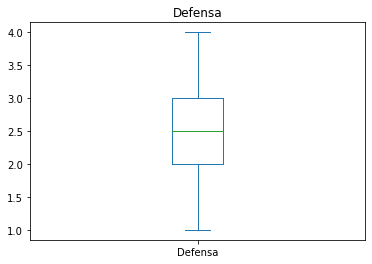

In [151]:
df['Defensa'].plot(kind='box', title='Defensa')

Esta variable esta muy bien repartida, tiene la misma cantidad de datos en los quartiles 2 y 3, y los mismos datos en los quatiles 1 y 4, adedmás observamos que no hay outliers.

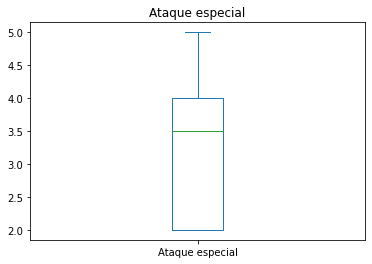

In [152]:
df['Ataque especial'].plot(kind='box', title='Ataque especial')

Esta vairable, Ataque especial, vemos que hay más pokemons con el ataque especial por encima de 3.5, por debajo de ese valor los poquemons están más dispersos.

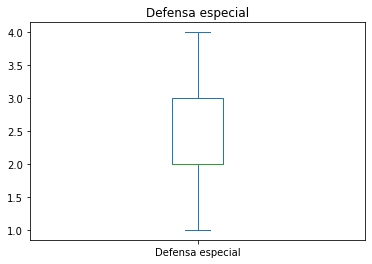

In [153]:
df['Defensa especial'].plot(kind='box', title='Defensa especial')

Vemos que esta variable se distribuye exactamente igual que la variable Puntos de Salud, podría ser porq ue están altamente relacionadas.

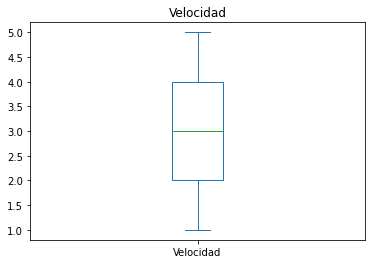

In [154]:
df['Velocidad'].plot(kind='box', title='Velocidad')

Esta variable esta muy bien repartida, tiene la misma cantidad de datos en todos los quartiles, adedmás observamos que no hay outliers.

Una vez comprobado que los datos están completos, bien repartidos y estudiados. Pocedemos a seguir con el enunciado, que nos especifica que normalicemos los datos con el fin de no tener diferencias de rango para que no haya problemas para procesar la información. 

In [155]:
#Importamos la librería necesaria para normalizar los datos
from sklearn.preprocessing import StandardScaler
#Seleccionamos los datos numéricos para la normalización de estos.
df1 = df[['PS','Ataque','Defensa','Ataque especial','Defensa especial', 'Velocidad']]
scaler = StandardScaler()
df_array= scaler.fit(df1)
df_norm_matriz = scaler.transform(df1)
df_norm = pd.DataFrame(data = df_norm_matriz, columns = ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"])


En la celda de arriba hemos creado una nueva base de datos en la que solo vamos a trabajar con los atributos numéricos, para ellos vamos a normalizar estos datos, para ello hemos hecho uso de la herramienta que nos indican para la normalización de estos.

#Modelado

A continuación, al tratarse de un análisis de componentes principales debemos seguir los pasos indicado para esto.

Lo primero es obtener los autovalores y los autovectores de la matriz de covarianza de los datos que nos interesan (ya hemos reducido la base de datos a los numéricos). Una vez obtenidos loa autovalores y los autovectores vamos a ver el porcentaje de varianza que explica cada uno de los autovaloes y vamos a observar también la acumulada.

In [156]:
df_cov = df_norm.cov()
eigenvalues, eigenvectors=np.linalg.eig(df_cov)
#Ordenamos de mayor a menor
eigenvalues = np.sort(eigenvalues)[::-1]
#calculamos el porcentaje de varianza
porcent_var=eigenvalues*100/sum(eigenvalues)
#calculamos el acumulado
porcent_acumulado=np.zeros(len(porcent_var))
porcent_acumulado[0]=porcent_var[0]
for i in range (1,len(porcent_acumulado)):
  porcent_acumulado[i]=porcent_acumulado[i-1]+porcent_var[i]
#creamos un DataFrame con los datos
df2 = pd.DataFrame({'Autovalores': eigenvalues, 'porcent_var': porcent_var,'porcent_acumulado': porcent_acumulado },index=[1,2, 3, 4, 5, 6])
df2

,Autovalores,porcent_var,porcent_acumulado
1,2.629979,41.641341,41.641341
2,1.550661,24.552140,66.193481
3,0.780824,12.363041,78.556522
4,0.715521,11.329090,89.885612
5,0.474598,7.514464,97.400076
6,0.164206,2.599924,100.000000


Aquí observamos una base de datos en la que hemos guardado los autovaloes de mayor a menor, así como su porcentaje de varianza que explican y el porcentaje de varianza acumulado.

La práctica en la que estamos trabajando consiste en reducir las dimensiones del problema para poder trabajar mejor, por ello a simple vista vemos como se podría reducir las dimensiones. Con solo 3 dimensiones se explicaría el 80%, es bastante bien número teniendo en cuenta que reducirmos la dimensión a la mitad.

Con dos componentes obtenemos un 66,19% de la información, por lo que estaríamos perdiendo un 33,8% de la información, algo más de 1/3 del total.

In [157]:
#verifiquemos que la traza de la matriz S (la obtenemos con la función tracede Numpy)
#es igual a la suma de los autovalores, que calculamos en el paso anterior.
traza1 = sum(eigenvalues)
traza2 = np.trace(df_cov)
if traza1 == traza1:
  print('La propiedad de la traza se cumple')


eigenvalues, eigenvectors=np.linalg.eig(df_cov)
for i in range(len(eigenvalues)):
    if np.allclose(np.dot(df_cov, eigenvectors[:, i]), eigenvalues[i] * eigenvectors[:, i]):
        print("El autovector {} es correcto".format(i+1))
    else:
        print("El autovector {} no es correcto".format(i+1))

La propiedad de la traza se cumple
El autovector 1 es correcto
El autovector 2 es correcto
El autovector 3 es correcto
El autovector 4 es correcto
El autovector 5 es correcto
El autovector 6 es correcto


In [158]:
#La proporción de variabilidad explicada por cada componente la podemos calcular con: 
prop=eigenvalues/np.trace(df_cov)
prop

array([0.41641341, 0.2455214 , 0.02599924, 0.07514464, 0.1132909 ,
       0.12363041])

In [159]:
#En porcentaje esto sería:
porcentaje=prop*100
porcentaje

array([41.64134115, 24.55213995,  2.59992386,  7.51446419, 11.32908958,
       12.36304127])

Debemos tener en cuenta que los autovectores que obtuvimos están ordenados.

Veamos un gráfico de sedimentación, el cual nos permitirá representar el porcentaje de variación explicado por cada componente o factor en las ordenadas y las componentes en orden decreciente en la abscisas con la finalidad de escoger los factores que retengan más variación.

In [160]:
y=sorted(porcentaje, reverse=True) #almacena los porcentajes de mayor a menor

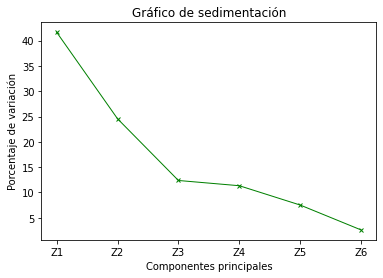

In [161]:
plt.plot(["Z1","Z2","Z3","Z4","Z5", "Z6"], y ,color='green', marker='x', linewidth=1, markersize=4)
plt.title("Gráfico de sedimentación")
plt.xlabel("Componentes principales")
plt.ylabel("Porcentaje de variación")
plt.show()

¿Por qué es útil este gráfico?

Pues bien, en cursos anteriores estudiando también este tema, Análisis de Componentes Principales (PCA) que hay varios tipos de criterio que debemos aplicar para decidir con cuantas dimensiones decidimos definir el problem, uno de ellos es fijar un porcentaje mínimo de explicación y otro es relacionado con este gráfico. 

Este criterio de llama el criteio del codo, y quiere decir que se cogen las componentes principales hasta que veamos que el diguente no baja tanto, es decir, haya un ángulo más agudo, en nuestro caso sería claramente 3 compomentes las que tendríamos que coger.

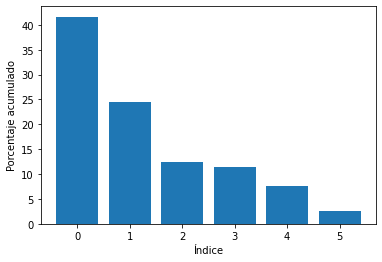

In [162]:
fig, ax = plt.subplots()
ax.bar(range(len(porcentaje)), y)
ax.set_xlabel('Índice')
ax.set_ylabel('Porcentaje acumulado')
plt.show()

Se puede observar un codo a partir de la tercera componente principal, por lo que retenemos estos componentes. Además lo podemos justificar con el porcentaje acumulado como bien hemos explicado arriba.

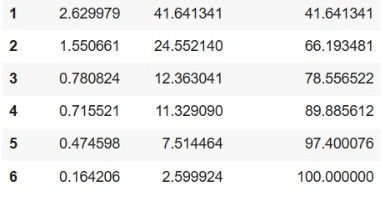

Calcularemos su correlación con las variables originales.


Ahora vamos a almacenar en otras varibles los autovalores que nos interesan que hemos dicho que son los 3 primeros, con estos crearemos lostres componentes que son con los que vamos a trabajara a portir de ahora porque son los que consideramos que debemos coger.

In [163]:
#Cogemos los tres primeros autovaloes
eigenvaluesr=eigenvalues[[0,1,2]]
eigenvectorsr=eigenvectors[:,[0,1,2]] # porq tomamos los 3 primeros autovecstores
#Convertimos la base de datos a una matriz
df_cov=df_cov.values

a11 = eigenvectors[0,0]
l1 = eigenvalues[0]
s11 = df_cov[0,0]
rx1y1=a11*np.sqrt(l1)/np.sqrt(s11)

rxy=[]
for i in range(len(eigenvalues)):
  for k in range(len(eigenvaluesr)): 
    aki=eigenvectorsr[i,k] 
    lk=eigenvaluesr[k]
    Sii=df_cov[i,i]
    rxiyk=aki*np.sqrt(lk)/np.sqrt(Sii) 
    rxy.append(rxiyk)
print("Correlación entre las variables originales y los componentes extraidos:",'\n','\n', 
      tabulate(np.array(rxy).reshape(len(eigenvalues),len(eigenvaluesr)), ["Comp. 1", "Comp. 2", "Comp.3"], 
               showindex=['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']))

Correlación entre las variables originales y los componentes extraidos: 
 
                     Comp. 1    Comp. 2      Comp.3
----------------  ---------  ---------  ----------
PS                 0.718474   0.192343   0.148792
Ataque             0.712448  -0.305835  -0.19429
Defensa            0.503951  -0.767083   0.216266
Ataque especial    0.669119   0.463983  -0.120217
Defensa especial   0.760279  -0.204539  -0.0908674
Velocidad          0.441568   0.705028   0.16318


Hemos sacado solo las tres primeras componentes principales ya que como hemos visto previamente nos representan casi el 80% de la información.

¿Qué podemos sacar obeservando esta tabla?

La primera componente representa las varibles: PS, Ataque, Ataque especial, Defensa especial y velocidad.

La segunda componente represnta la variable de Defensa.

Y por último la tercera, no representa es especial a ninguna, pero sin embargo, sigue añadiendo información de las ya representadas.

¿Comó sabemos que componente representa a cada variable?

Pues bien, en cada atributo (filas) vemos los valores que explican cada una de las componentes, los valores más cercanos al valor absoluto de 1, sin tener el cuenta el negativo o positivo, de momento solo son fijamos en cuál es más alto en valor absoluto. El signo, nos indica de que manera de relacionan, es decir, directamente o inversamente.

## Ejercicio 3 

Para representar gráficamente los individuos de un dataset utilizando las componentes principales obtenidas, podemos utilizar un diagrama de dispersión de 2 dimensiones. 

Para ello, debemos coger solo las dos primeras componentes principales que son las que nos van a dar la información que queremos para realizar este apartado.

Cada punto en el diagrama representará un individuo del dataset, y las coordenadas del punto serán los valores de las dos primeras componentes principales. 

Para continuar con el ejercicio debemos primero calculamos las 2 primeras componentes principales. 

In [164]:
#Realizamos lo mismo que hemos hecho en el apartado anterior pero 
#teniendo en cuenta solo los dos primeros autovaloes y autovectores
eigenvalues3=eigenvalues[[0,1]]
eigenvectors3=eigenvectors[:,[0,1]] #0,1 porq tomamos los 2 primeros
rxy=[]
for i in range(len(eigenvalues)):
  for k in range(len(eigenvalues3)): 
    aki=eigenvectors3[i,k] 
    lk=eigenvalues3[k]
    Sii=df_cov[i,i]
    rxiyk=aki*np.sqrt(lk)/np.sqrt(Sii) 
    rxy.append(rxiyk)
print("Correlación entre las variables originales y los componentes extraidos:",'\n','\n', 
      tabulate(np.array(rxy).reshape(len(eigenvalues),len(eigenvalues3)), ["Comp. 1", "Comp. 2"], 
               showindex=['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']))

Correlación entre las variables originales y los componentes extraidos: 
 
                     Comp. 1    Comp. 2
----------------  ---------  ---------
PS                 0.718474   0.192343
Ataque             0.712448  -0.305835
Defensa            0.503951  -0.767083
Ataque especial    0.669119   0.463983
Defensa especial   0.760279  -0.204539
Velocidad          0.441568   0.705028


In [166]:
#rxy era un vector y lo convertimos en matrix
rxy=np.array(rxy).reshape(len(eigenvalues),len(eigenvalues3))

array([[ 0.71847437,  0.1923428 ],
       [ 0.71244816, -0.30583539],
       [ 0.50395061, -0.76708342],
       [ 0.66911877,  0.46398253],
       [ 0.76027908, -0.20453877],
       [ 0.44156795,  0.70502801]])

In [ ]:
datos=df.values

In [ ]:
df_norm

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


Vamos a crear los valores a representar, es decir, vamos a calcular los puntos (C1, C2) de cada individuo, de la forma: 

      Individuo 1 C1=0.0595012*X1+0.596317*X2+...+0.285252 *X8
  
      (siendo X1,...,X8 los valores del indivviduo 1)

In [167]:
df_norm.iloc[0]

PS                 -0.326164
Ataque              0.054313
Defensa            -0.750000
Ataque especial     0.564152
Defensa especial   -0.500000
Velocidad           1.037975
Name: 0, dtype: float64

In [168]:
c1=np.zeros(len(df_norm))
c2=np.zeros(len(df_norm))

In [169]:
for i in range (len(df_norm)):
  c1[i]=sum(-(rxy[:,0])*(df_norm.iloc[i]))
  c2[i]=sum(-(rxy[:,1])*(df_norm.iloc[i]))


In [170]:
#creamos un dataframe para poder graficarlo mejor en el diagrama de dispersion
df3 = pd.DataFrame(columns=[' 1', 'Componente 2'])
dat1 = pd.DataFrame({'Componente 1': c1})
dat2 = pd.DataFrame({'Componente 2': c2})
df3=dat1.join(dat2)

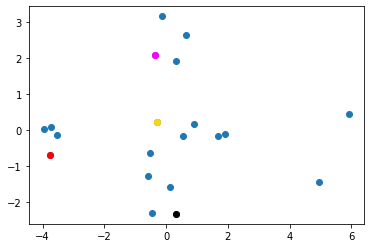

In [171]:
fig, ax= plt.subplots()
ax.scatter(c1,c2)
ax.scatter(c1[5], c2[5], color = 'r')
ax.scatter(c1[8], c2[8], color = 'magenta')
ax.scatter(c1[13], c2[13], color = 'gold')
ax.scatter(c1[19], c2[19], color = 'k')
#df3.plot.scatter(x='Componente 1', y='Componente 2', s =20 , c = 'Blue')

## Ejercicio 4

In [ ]:
rxy

array([[ 0.71847437,  0.1923428 ],
       [ 0.71244816, -0.30583539],
       [ 0.50395061, -0.76708342],
       [ 0.66911877,  0.46398253],
       [ 0.76027908, -0.20453877],
       [ 0.44156795,  0.70502801]])

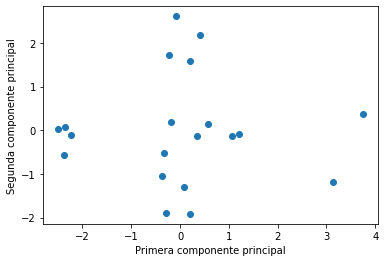

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_norm)

# crea un diagrama de dispersión de 2 dimensiones
fig, ax = plt.subplots()
ax.scatter(componentes_principales[:, 0], componentes_principales[:, 1])

# agrega etiquetas a los ejes
ax.set_xlabel('Primera componente principal')
ax.set_ylabel('Segunda componente principal')


# muestra el diagrama de dispersión
plt.show()